In [18]:
#4.9 Final Task 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Create a path to main folder
path = r'C:\Users\reece\InstaCart Basket Analysis 4.4.23'
# Import dataset
df_ords_prods_merged = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_merged_aggregated.pkl'))
df_customer = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'customers.csv'))
                            

In [20]:
df_customer.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [21]:
df_ords_prods_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,add_to_cart_order,reordered,_merge,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,5,0,both,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,1,both,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,20,0,both,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,10,0,both,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,11,1,both,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


In [22]:
df = df_ords_prods_merged.drop(['product_id', 'aisle_id', 'department_id', 'order_id','order_number', 'orders_day_of_week', '_merge','add_to_cart_order', 'reordered', 'median_freq', 'order_hour_of_day', 'avg_price'], axis=1)


In [24]:
df.head()

,product_name,prices,user_id,days_since_prior_order,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_freq_flag
0,Chocolate Sandwich Cookies,5.8,138,3.0,Most orders,32,Regular customer,Low spender,Frequent customer
1,Chocolate Sandwich Cookies,5.8,138,20.0,Average orders,32,Regular customer,Low spender,Frequent customer
2,Chocolate Sandwich Cookies,5.8,709,6.0,Average orders,5,New customer,Low spender,Frequent customer
3,Chocolate Sandwich Cookies,5.8,764,NaN,Most orders,3,New customer,Low spender,Frequent customer
4,Chocolate Sandwich Cookies,5.8,764,9.0,Average orders,3,New customer,Low spender,Frequent customer


In [26]:
# Create a dictionary to map old column names to new column names
column_name_mapping = {'old_column_name1': 'new_column_name1', 'old_column_name2': 'new_column_name2',}

# Use the rename() method to change the column names
df = df.rename(columns=column_name_mapping)



SyntaxError: ':' expected after dictionary key (1498142451.py, line 2)

In [27]:
df_name_change = {'product_name': 'Not_Product_Name',
                  'prices': 'Not_Prices',
                  'user_id': 'user_id',
                  'days_since_prior_order': 'Not_days_since_prior_order',
                  'busiest_period_of_day': 'Not_busiest_period_of_day',
                  'loyalty_flag': 'Not_loyalty_flag',
                  'spending_flag': 'Not_spending_flag',
                  'order_freq_flag': 'Not_order_freq_flag'}
                  

df_wrangled = df.rename(columns=df_name_change)


In [28]:
df_wrangled.head()

,Not_Product_Name,Not_Prices,user_id,Not_days_since_prior_order,Not_busiest_period_of_day,max_order,Not_loyalty_flag,Not_spending_flag,Not_order_freq_flag
0,Chocolate Sandwich Cookies,5.8,138,3.0,Most orders,32,Regular customer,Low spender,Frequent customer
1,Chocolate Sandwich Cookies,5.8,138,20.0,Average orders,32,Regular customer,Low spender,Frequent customer
2,Chocolate Sandwich Cookies,5.8,709,6.0,Average orders,5,New customer,Low spender,Frequent customer
3,Chocolate Sandwich Cookies,5.8,764,NaN,Most orders,3,New customer,Low spender,Frequent customer
4,Chocolate Sandwich Cookies,5.8,764,9.0,Average orders,3,New customer,Low spender,Frequent customer


In [29]:
# Check for missing values in the entire DataFrame
df.isnull().sum()

# Drop rows with missing values
df.dropna(inplace=True)

# Fill missing values with appropriate values
df.fillna(value=0, inplace=True)


In [31]:
df_wrangled.isnull().sum()

Not_Product_Name                8739
Not_Prices                         0
user_id                            0
Not_days_since_prior_order    636003
Not_busiest_period_of_day          0
max_order                          0
Not_loyalty_flag                   0
Not_spending_flag                  0
Not_order_freq_flag                0
dtype: int64

In [32]:
df_wrangled.dropna(inplace=True)

In [33]:

df_wrangled.fillna(value=0, inplace=True)

In [34]:
# Check for duplicates in the entire DataFrame
df.duplicated().sum()

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop duplicate rows based on specific columns
df.drop_duplicates(subset=['column1', 'column2'], inplace=True)

KeyError: Index(['column1', 'column2'], dtype='object')

In [35]:

df_wrangled.duplicated().sum()

1280923

In [36]:
df_wrangled.drop_duplicates(inplace=True)

In [37]:
df.drop_duplicates(inplace=True)

In [38]:

# Check data types of all columns in the DataFrame
df.dtypes


# Convert data types of specific columns
df['column1'] = df['column1'].astype(int)
df['column2'] = df['column2'].astype(float)

# Convert data types of multiple columns at once
df[['column1', 'column2']] = df[['column1', 'column2']].astype(int)

KeyError: 'column1'

In [ ]:
df_wrangled.dtypes

In [41]:
df_wrangled_cust_merged = df_wrangled.merge(df_customer, on='user_id', how='left')


df_wrangled_cust_merged.head()

In [42]:
df_subset = df_wrangled_cust_merged[:2000000]


In [43]:
np.random.seed(4)
dev = np.random.rand(len(df_subset)) <= 0.7

In [44]:
df_subset.head(100)

,Not_Product_Name,Not_Prices,user_id,Not_days_since_prior_order,Not_busiest_period_of_day,max_order,Not_loyalty_flag,Not_spending_flag,Not_order_freq_flag,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,Chocolate Sandwich Cookies,5.8,138,3.0,Most orders,32,Regular customer,Low spender,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,Chocolate Sandwich Cookies,5.8,138,20.0,Average orders,32,Regular customer,Low spender,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,Chocolate Sandwich Cookies,5.8,709,6.0,Average orders,5,New customer,Low spender,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,Chocolate Sandwich Cookies,5.8,764,9.0,Average orders,3,New customer,Low spender,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,Chocolate Sandwich Cookies,5.8,777,26.0,Average orders,26,Regular customer,Low spender,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Chocolate Sandwich Cookies,5.8,13141,7.0,Average orders,43,Loyal customer,Low spender,Frequent customer,Samuel,Lambert,Male,Massachusetts,27,12/22/2019,0,single,53309
96,Chocolate Sandwich Cookies,5.8,13141,10.0,Average orders,43,Loyal customer,Low spender,Frequent customer,Samuel,Lambert,Male,Massachusetts,27,12/22/2019,0,single,53309
97,Chocolate Sandwich Cookies,5.8,13141,4.0,Average orders,43,Loyal customer,Low spender,Frequent customer,Samuel,Lambert,Male,Massachusetts,27,12/22/2019,0,single,53309
98,Chocolate Sandwich Cookies,5.8,13141,7.0,Least orders,43,Loyal customer,Low spender,Frequent customer,Samuel,Lambert,Male,Massachusetts,27,12/22/2019,0,single,53309


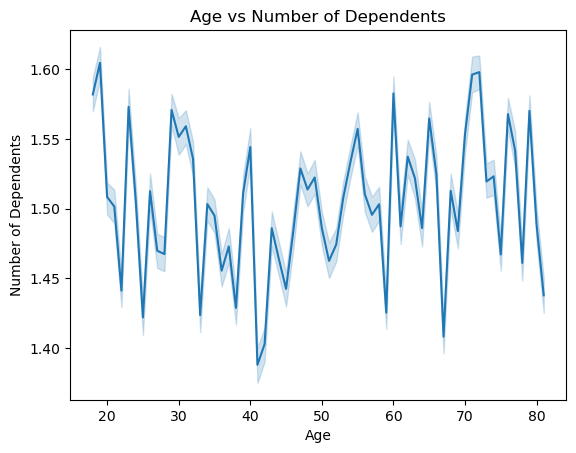

In [45]:

# Create a line chart

sns.lineplot(data=df_subset, x='Age', y='n_dependants')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')
plt.title('Age vs Number of Dependents')
plt.show()


In [46]:
# List of columns to rename
columns_to_rename = ['Not_Product_Name', 'Not_Prices', 'user_id', 'Not_days_since_prior_order', 'Not_busiest_period_of_day', 'Not_loyalty_flag', 'Not_spending_flag', 'Not_order_freq_flag', 'First']

# Loop through the columns and rename them
for col in columns_to_rename:
    new_col = col.replace('Not_', '')  # Remove "Not_" prefix
    df_wrangled_cust_merged.rename(columns={col: new_col}, inplace=True)

# Verify the updated column names
print(df_wrangled_cust_merged.columns)


Index(['Product_Name', 'Prices', 'user_id', 'days_since_prior_order',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'order_freq_flag', 'First Name', 'Surnam', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')


In [47]:
df_wrangled_cust_merged.head()

,Product_Name,Prices,user_id,days_since_prior_order,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_freq_flag,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,Chocolate Sandwich Cookies,5.8,138,3.0,Most orders,32,Regular customer,Low spender,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,Chocolate Sandwich Cookies,5.8,138,20.0,Average orders,32,Regular customer,Low spender,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,Chocolate Sandwich Cookies,5.8,709,6.0,Average orders,5,New customer,Low spender,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,Chocolate Sandwich Cookies,5.8,764,9.0,Average orders,3,New customer,Low spender,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,Chocolate Sandwich Cookies,5.8,777,26.0,Average orders,26,Regular customer,Low spender,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797


In [48]:
# List of columns to remove
columns_to_remove = ['First Name', 'Surnam']

# Drop the columns
df_wrangled_cust_merged.drop(columns=columns_to_remove, inplace=True)




In [49]:

# Verify the updated dataframe
df_wrangled_cust_merged.head()

,Product_Name,Prices,user_id,days_since_prior_order,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,Chocolate Sandwich Cookies,5.8,138,3.0,Most orders,32,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,Chocolate Sandwich Cookies,5.8,138,20.0,Average orders,32,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,Chocolate Sandwich Cookies,5.8,709,6.0,Average orders,5,New customer,Low spender,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302
3,Chocolate Sandwich Cookies,5.8,764,9.0,Average orders,3,New customer,Low spender,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308
4,Chocolate Sandwich Cookies,5.8,777,26.0,Average orders,26,Regular customer,Low spender,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797


In [50]:
df_wrangled_cust_merged.to_pickle(os.path.join(path,'Data','Prepared Data','wrangled_cust_merged.pkl'))